<a href="https://colab.research.google.com/github/saleemmarwat/Audioclassification/blob/main/lstm_forecasting_with_RF_and_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM-only code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the input CSV file
df = pd.read_csv('/content/drive/MyDrive/upwork tasks/Karol B/AC_output.csv', parse_dates=['Datetime'])  # Parse 'Datetime' as datetime objects

# Extract the hour of the day from the 'Datetime' column
df['Hour of the Day'] = df['Datetime'].dt.hour

# Save the DataFrame to the output CSV file
df.to_csv('combined_variables.csv', index=False)  # Set index=False to avoid saving the index

print(f"Data with 'Hour of the Day' appended saved to: {'combined_variables.csv'}")

df = pd.read_csv('/content/combined_variables.csv', index_col=0)  # Load the dataset
df.index = pd.to_datetime(df.index)  # Convert the index to datetime

Data with 'Hour of the Day' appended saved to: combined_variables.csv


In [ ]:

import pandas as pd

# Assuming the 'Datetime' column is already set as the index
# Filter the data to only include the test set range (March 2023 to December 2023)
test_data = df['2023-03':'2023-12']

# Step 1: Aggregate the test data by week and calculate mean values
weekly_data = test_data.resample('W').mean()

# Display the aggregated weekly data for inspection
print("Weekly Data (Aggregated from March 2023 to December 2023):")
print(weekly_data[['AC Power (W)', 'Solar Irradiation (W/m^2)', 'Ambient Temperature (°C)']])

# Step 2: Define summer and winter periods within the test data range
# For example: June to August for summer, and December for winter
summer_period = weekly_data['2023-06':'2023-08']  # Summer within the test period
winter_period = weekly_data['2023-11':'2023-12']  # Winter within the test period (December 2023)

# Step 3: Identify the most representative summer week (highest average solar irradiation and temperature)
best_summer_week = summer_period[['Solar Irradiation (W/m^2)', 'Ambient Temperature (°C)']].mean(axis=1).idxmax()

# Step 4: Identify the most representative winter week (lowest average solar irradiation and temperature)
best_winter_week = winter_period[['Solar Irradiation (W/m^2)', 'Ambient Temperature (°C)']].mean(axis=1).idxmin()

# Print out the results
print(f"Most representative summer week (2023): {best_summer_week}")
print(f"Most representative winter week (2023): {best_winter_week}")

# Optional: Retrieve the exact values for the best summer and winter week
best_summer_values = weekly_data.loc[best_summer_week]
best_winter_values = weekly_data.loc[best_winter_week]

print("\nBest Summer Week Values (2023):")
print(best_summer_values[['AC Power (W)', 'Solar Irradiation (W/m^2)', 'Ambient Temperature (°C)']])

print("\nBest Winter Week Values (2023):")
print(best_winter_values[['AC Power (W)', 'Solar Irradiation (W/m^2)', 'Ambient Temperature (°C)']])


Weekly Data (Aggregated from March 2023 to December 2023):
            AC Power (W)  Solar Irradiation (W/m^2)  Ambient Temperature (°C)
Datetime                                                                     
2023-03-05    218.299589                 169.283333                  8.258333
2023-03-12     59.907988                  97.529762                 13.583929
2023-03-19    171.448899                 172.720238                 12.251190
2023-03-26    168.551003                 179.726190                 12.517262
2023-04-02    190.772443                 201.511905                 14.253571
2023-04-09    283.155472                 263.785714                 14.563690
2023-04-16    173.250984                 200.476190                 13.814881
2023-04-23    220.303712                 238.357143                 15.400595
2023-04-30    205.084272                 249.297619                 16.248214
2023-05-07    229.600926                 266.095238                 17.021429
2023-

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 58050.9648 - val_loss: 27280.5684
Epoch 2/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25975.9863 - val_loss: 26645.6660
Epoch 3/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 28321.0352 - val_loss: 19766.1016
Epoch 4/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20737.4844 - val_loss: 18998.5625
Epoch 5/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19228.4746 - val_loss: 16665.3184
Epoch 6/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18313.6738 - val_loss: 17358.1387
Epoch 7/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17614.1309 - val_loss: 17634.9004
Epoch 8/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17446.0332 - val_loss: 15985.1416
Epoch 9/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 16849.1309 - val_loss: 16174.7051
Epoch 10/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17840.3633 - val_loss: 22427.7188
Epoch 11/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

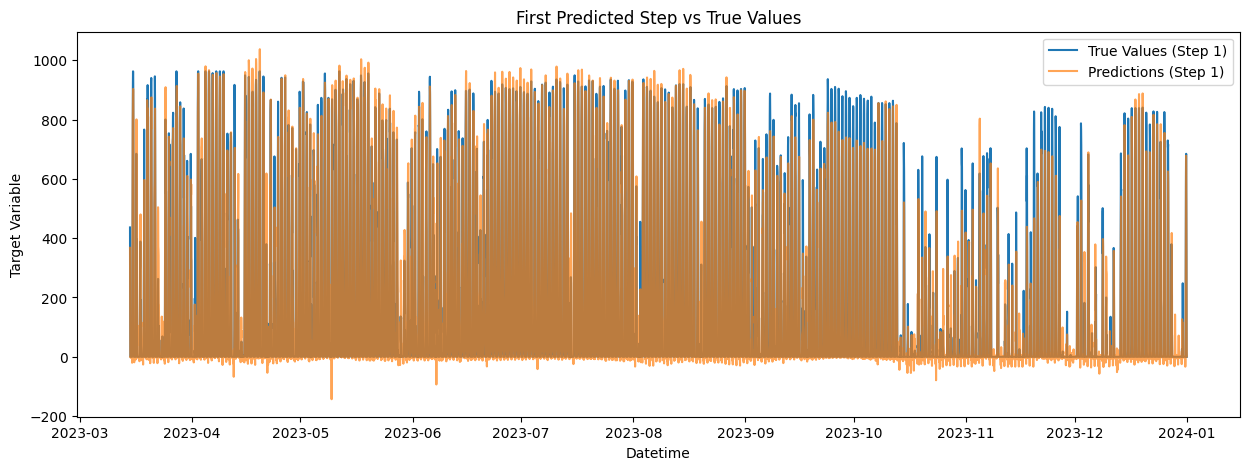

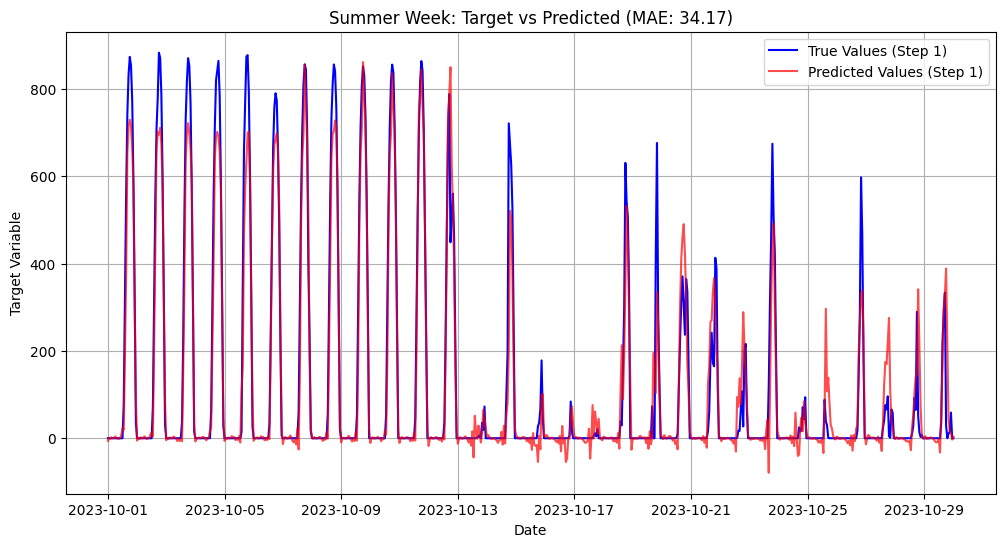

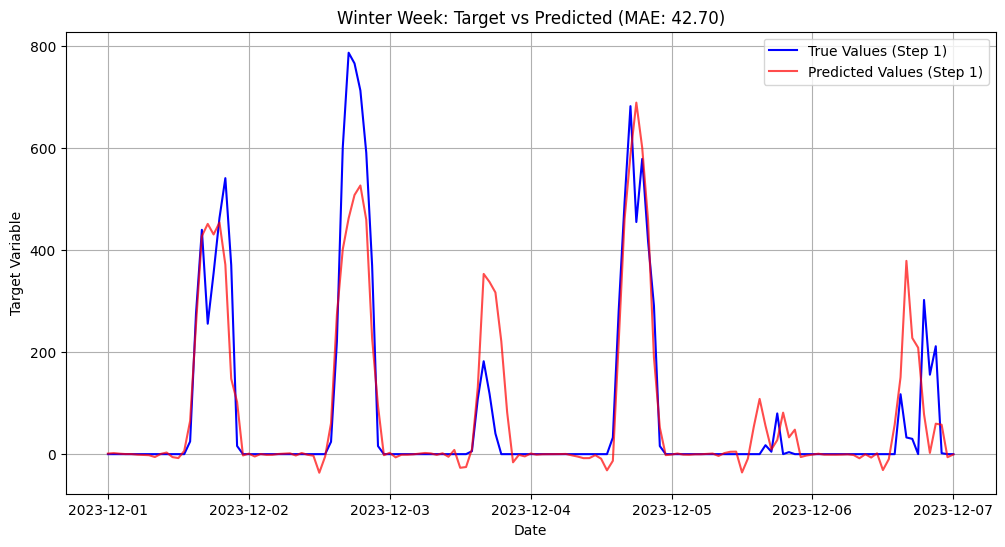

Full results saved to prediction_results.xlsx
Full results saved to prediction_results.csv


In [ ]:
def lstm_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):

    # Prepare the input and target data for the LSTM model
    def prepare_data(data, n_steps_in, n_steps_out):
        X, y = [], []
        for i in range(len(data) - n_steps_in - n_steps_out + 1):
            # Features (exclude the first column which is the target)
            X.append(data[i:(i + n_steps_in), 1:])
            # Target (first column, assuming it's "PV Power Output")
            y.append(data[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0])
        return np.array(X), np.array(y)

    # Convert the dataframe to a NumPy array and prepare data
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps_in, X.shape[2])),
        Dense(n_steps_out)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

    # Train the model
    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")

    # Add the new loop to calculate MAE and RMSE for each prediction step
    for i in range(n_steps_out):
        mae = mean_absolute_error(y_test[:, i], predictions[:, i])
        rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
        print(f"Step {i+1} - MAE: {mae}, RMSE: {rmse}")

    # Plot the first prediction step
    plt.figure(figsize=(15, 5))
    plt.plot(df.index[-len(y_test):], y_test[:, 0], label='True Values (Step 1)')
    plt.plot(df.index[-len(predictions):], predictions[:, 0], label='Predictions (Step 1)', alpha=0.7)
    plt.title('First Predicted Step vs True Values')
    plt.xlabel('Datetime')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()

    # Function to plot predictions vs true values for a specific date range
    def plot_week_comparison(y_test, predictions, df_index, test_index_start, start_date, end_date, title=""):
        # Convert the date range into an index slice (applies to the full dataset index)
        mask = (df_index >= start_date) & (df_index <= end_date)

        # Check if the mask is empty (no dates in the specified range)
        if not mask.any():
            print(f"No data found between {start_date} and {end_date}.")
            return

        # Extract the relevant date indices (from df.index)
        relevant_dates = df_index[mask]

        # Calculate the range in y_test/predictions corresponding to the test data
        # test_index_start indicates where the test set begins in df_index
        start_idx = np.where(df_index == relevant_dates[0])[0][0] - test_index_start
        end_idx = np.where(df_index == relevant_dates[-1])[0][0] - test_index_start + 1  # +1 to include end date

        # Ensure the indices are within the bounds of y_test and predictions
        if start_idx < 0 or end_idx > len(y_test):
            print("Index range exceeds the length of the test data.")
            return

        # Extract the true and predicted values for the selected range
        y_true_week = y_test[start_idx:end_idx, 0]  # First step (0) for true values
        y_pred_week = predictions[start_idx:end_idx, 0]  # First step (0) for predictions

        # Calculate MAE for the selected range
        mae = mean_absolute_error(y_true_week.flatten(), y_pred_week.flatten())

        # Plot the true values vs predictions
        plt.figure(figsize=(12, 6))
        plt.plot(relevant_dates, y_true_week.flatten(), label='True Values (Step 1)', color='b')
        plt.plot(relevant_dates, y_pred_week.flatten(), label='Predicted Values (Step 1)', color='r', alpha=0.7)
        plt.title(f'{title}: Target vs Predicted (MAE: {mae:.2f})')
        plt.xlabel('Date')
        plt.ylabel('Target Variable')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Example usage for a summer week and a winter week
    summer_start = '2023-10-01'  # Replace with actual date in your data
    summer_end = '2023-10-30'    # Replace with actual date in your data
    winter_start = '2023-12-01'  # Replace with actual date in your data
    winter_end = '2023-12-07'    # Replace with actual date in your data

    # Assuming df.index is your dataframe's datetime index and n_steps_out is defined
    # test_index_start is where your test data starts in the full dataset index
    train_data_length = len(df.index) - len(y_test)  # The length of the training set

    plot_week_comparison(y_test, predictions, df.index, train_data_length, summer_start, summer_end, title="Summer Week")
    plot_week_comparison(y_test, predictions, df.index, train_data_length, winter_start, winter_end, title="Winter Week")


    # Function to save the full results to Excel and CSV
    def save_full_results(y_test, predictions, df_index, filename):
        # Ensure that y_test and predictions are both aligned with the first step (step 0)
        y_true_full = y_test[:, 0]  # First step (step 0) of the multi-step target
        y_pred_full = predictions[:, 0]  # First step (step 0) of the multi-step predictions

        # Ensure that df_index matches the length of the target/predictions
        df_index = df_index[:len(y_true_full)]

        # Calculate MAE for each row
        mae_values = [mean_absolute_error([y_true], [y_pred]) for y_true, y_pred in zip(y_true_full, y_pred_full)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({
            'Datetime': df_index,  # Ensure datetime index matches the target length
            'Target': y_true_full,
            'Prediction': y_pred_full,
            'MAE': mae_values
        })

        # Save to Excel
        excel_filename = f"{filename}.xlsx"
        results_df.to_excel(excel_filename, index=False)
        print(f"Full results saved to {excel_filename}")

        # Save to CSV
        csv_filename = f"{filename}.csv"
        results_df.to_csv(csv_filename, index=False)
        print(f"Full results saved to {csv_filename}")

    # Example usage for the full dataset
    save_full_results(y_test, predictions, df.index, "prediction_results")

# Example call (replace with actual parameters and filename)
lstm_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)




LSTM, RandomForest Regressor, and Support vector Regressor code(standalone plots)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 58404.1211 - val_loss: 26043.4199
Epoch 2/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24006.7441 - val_loss: 29843.1348
Epoch 3/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26119.6270 - val_loss: 20582.0703
Epoch 4/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23770.1484 - val_loss: 27063.9434
Epoch 5/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23745.9961 - val_loss: 21526.6543
Epoch 6/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20173.4746 - val_loss: 18217.3906
Epoch 7/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18868.1094 - val_loss: 17299.9980
Epoch 8/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18586.4844 - val_loss: 16619.4082
Epoch 9/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17446.9980 - val_loss: 16685.2305
Epoch 10/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18081.3340 - val_loss: 15443.6006
Epoch 11/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

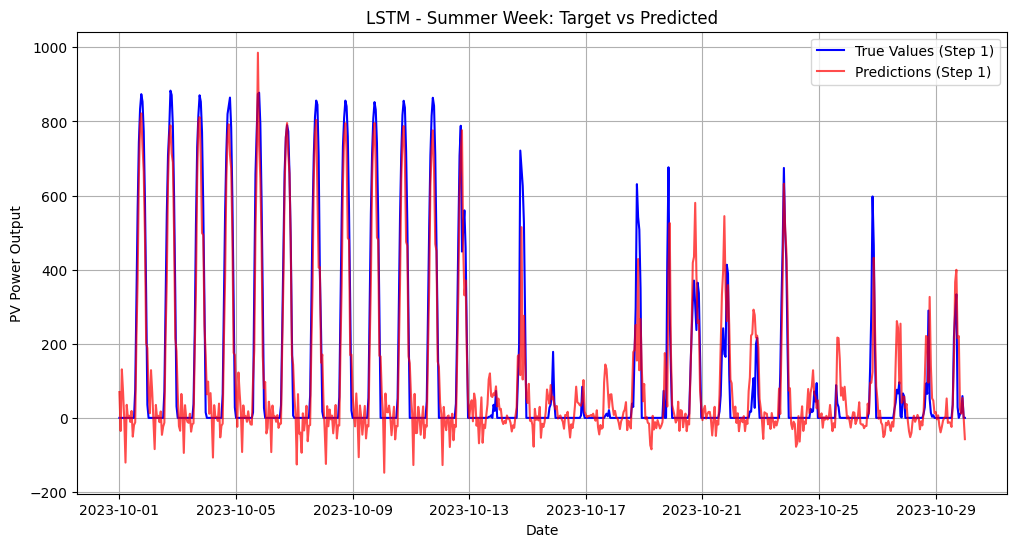

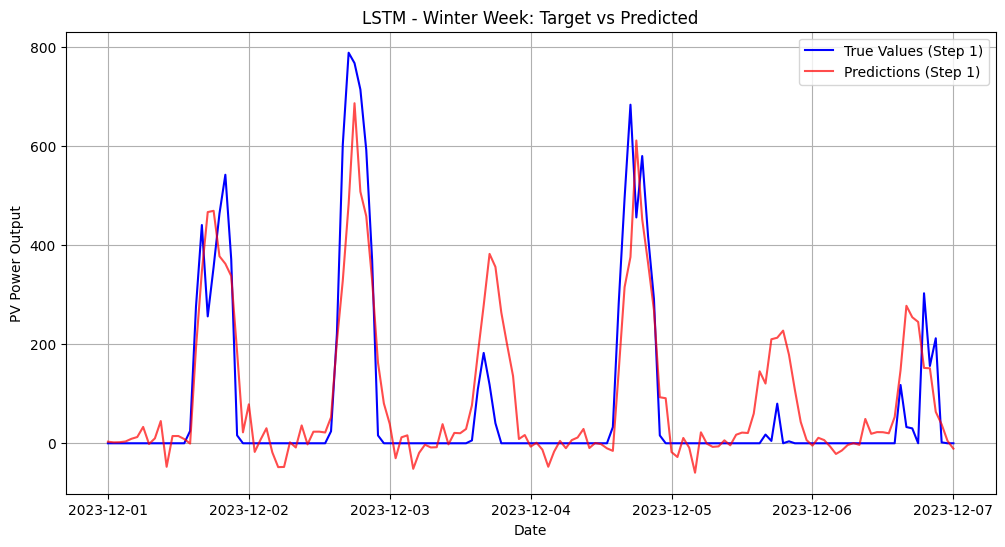

Random Forest - MAE: 49.08950671564584
Random Forest - RMSE: 108.6310485366361
Random Forest Step 1 - MAE: 29.225936404537716, RMSE: 71.02236116754926
Random Forest Step 2 - MAE: 40.52943160932497, RMSE: 91.07204267913036
Random Forest Step 3 - MAE: 48.5804256145967, RMSE: 105.93657984587503
Random Forest Step 4 - MAE: 54.85569915113587, RMSE: 117.27187559501239
Random Forest Step 5 - MAE: 58.96677094105954, RMSE: 124.76161432730977
Random Forest Step 6 - MAE: 62.3787765732202, RMSE: 130.09697663236017


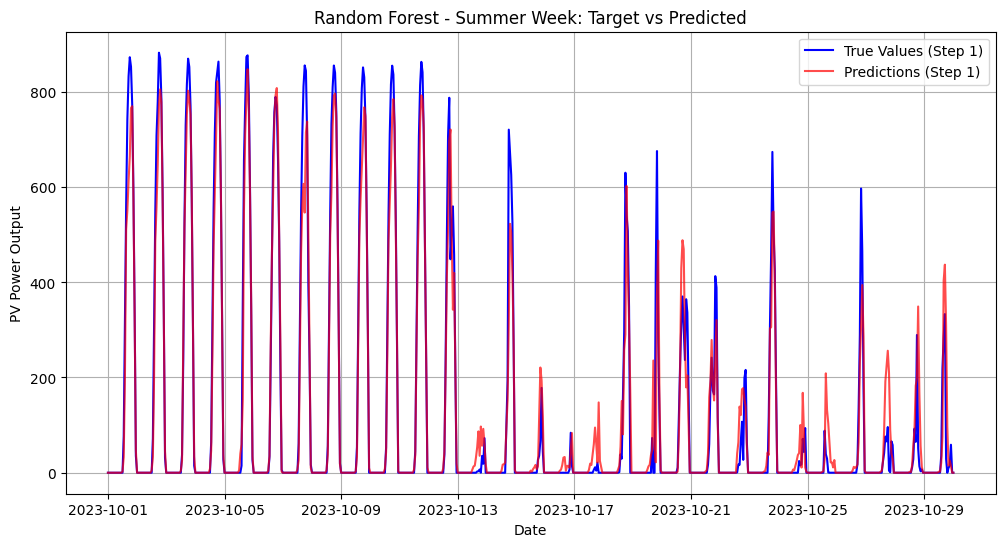

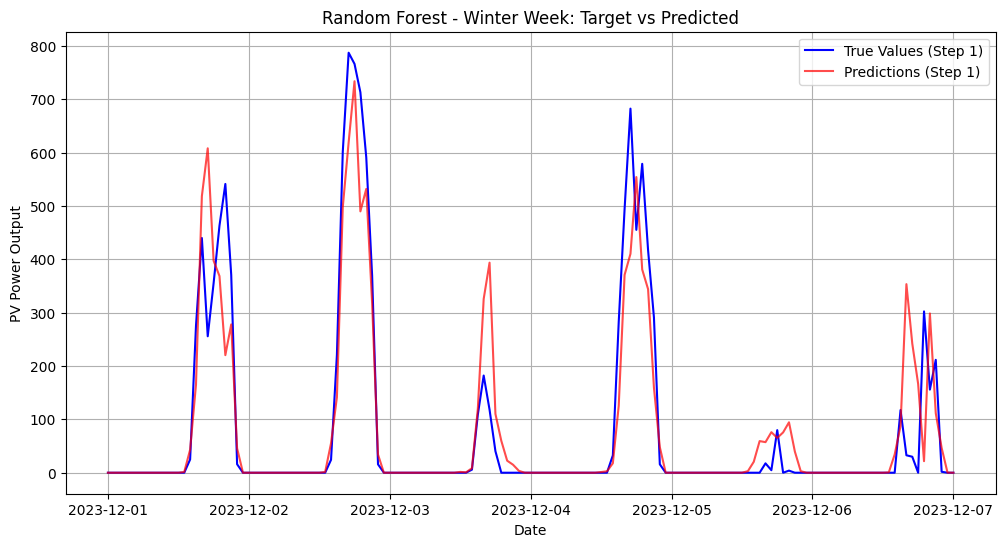

SVR - MAE: 160.05884361433684
SVR - RMSE: 276.75586079464875
SVR Step 1 - MAE: 50.137355008108784, RMSE: 99.62277436893667
SVR Step 2 - MAE: 88.83297938916725, RMSE: 158.15442535677016
SVR Step 3 - MAE: 137.3553499498116, RMSE: 229.77738402200595
SVR Step 4 - MAE: 184.75036731834854, RMSE: 296.0177109572163
SVR Step 5 - MAE: 229.25171138521247, RMSE: 352.9486149930019
SVR Step 6 - MAE: 270.0252986353722, RMSE: 399.5353091259932


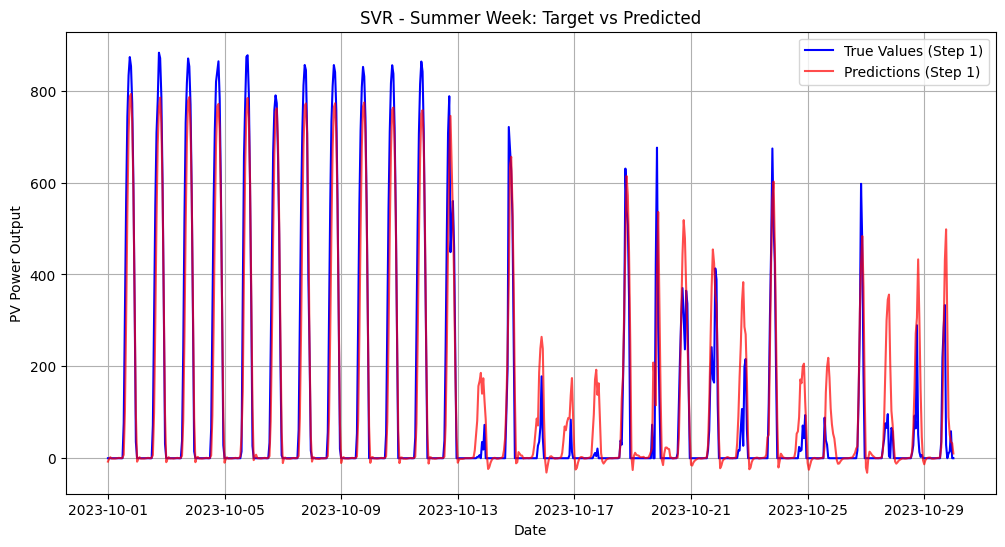

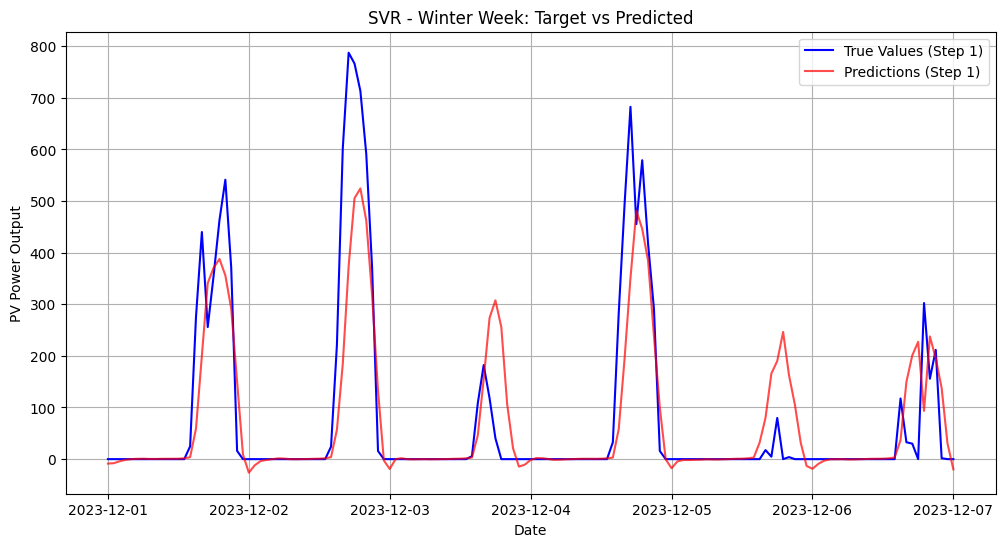

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Prepare data function (used by all models)
def prepare_data(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:(i + n_steps_in), 1:])  # Features (exclude first column)
        y.append(data[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0])  # Target (first column)
    return np.array(X), np.array(y)

# LSTM Prediction
def lstm_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps_in, X.shape[2])),
        Dense(n_steps_out)
    ])
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

    # Train the model
    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    # Predictions and Metrics
    predictions = model.predict(X_test)
    calculate_metrics(y_test, predictions, n_steps_out, "LSTM")
    plot_week_comparison(y_test, predictions, df.index, len(df.index) - len(y_test), "LSTM")

# Random Forest Prediction
def rf_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Flatten for Random Forest
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Define and Train RF model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_flat, y_train)

    # Predictions and Metrics
    predictions = rf.predict(X_test_flat)
    calculate_metrics(y_test, predictions, n_steps_out, "Random Forest")
    plot_week_comparison(y_test, predictions, df.index, len(df.index) - len(y_test), "Random Forest")

# Support Vector Regression (SVR) Prediction
def svr_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Flatten for SVR
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Define and Train SVR model
    svr = SVR(kernel='rbf')
    svr.fit(X_train_flat, y_train[:, 0])  # Only fit the first step of target

    # Replicate predictions across steps
    predictions = np.tile(svr.predict(X_test_flat)[:, np.newaxis], (1, y_train.shape[1]))

    # Predictions and Metrics
    calculate_metrics(y_test, predictions, n_steps_out, "SVR")
    plot_week_comparison(y_test, predictions, df.index, len(df.index) - len(y_test), "SVR")

# Function to calculate metrics
def calculate_metrics(y_test, predictions, n_steps_out, model_name):
    mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - RMSE: {rmse}")

    # Step-wise MAE and RMSE
    for i in range(n_steps_out):
        step_mae = mean_absolute_error(y_test[:, i], predictions[:, i])
        step_rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
        print(f"{model_name} Step {i+1} - MAE: {step_mae}, RMSE: {step_rmse}")

# Function to plot predictions vs true values for a specific date range
def plot_week_comparison(y_test, predictions, df_index, test_index_start, model_name):
    summer_start = '2023-10-01'
    summer_end = '2023-10-30'
    winter_start = '2023-12-01'
    winter_end = '2023-12-07'

    plot_for_range(y_test, predictions, df_index, test_index_start, summer_start, summer_end, f"{model_name} - Summer Week")
    plot_for_range(y_test, predictions, df_index, test_index_start, winter_start, winter_end, f"{model_name} - Winter Week")

# Helper function for plotting in specific ranges
def plot_for_range(y_test, predictions, df_index, test_index_start, start_date, end_date, title):
    mask = (df_index >= start_date) & (df_index <= end_date)
    if not mask.any():
        print(f"No data found between {start_date} and {end_date}.")
        return

    relevant_dates = df_index[mask]
    start_idx = np.where(df_index == relevant_dates[0])[0][0] - test_index_start
    end_idx = np.where(df_index == relevant_dates[-1])[0][0] - test_index_start + 1

    if start_idx < 0 or end_idx > len(y_test):
        print("Index range exceeds the length of the test data.")
        return

    y_true_week = y_test[start_idx:end_idx, 0]
    y_pred_week = predictions[start_idx:end_idx, 0]

    plt.figure(figsize=(12, 6))
    plt.plot(relevant_dates, y_true_week.flatten(), label='True Values (Step 1)', color='b')
    plt.plot(relevant_dates, y_pred_week.flatten(), label='Predictions (Step 1)', color='r', alpha=0.7)
    plt.title(f'{title}: Target vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('PV Power Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example call
lstm_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)
rf_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)
svr_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)


LSTM, RandomForest Regressor, and Support vector Regressor code(combined polots)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 59705.2266 - val_loss: 25266.8613
Epoch 2/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22358.2422 - val_loss: 23119.5215
Epoch 3/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21709.5488 - val_loss: 20501.4805
Epoch 4/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19736.1367 - val_loss: 23394.0176
Epoch 5/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25604.6406 - val_loss: 20265.8633
Epoch 6/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21070.4746 - val_loss: 18432.0254
Epoch 7/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19903.0020 - val_loss: 19307.6035
Epoch 8/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19592.9199 - val_loss: 17470.3906
Epoch 9/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17900.8145 - val_loss: 16341.4336
Epoch 10/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17362.4219 - val_loss: 15008.0176
Epoch 11/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

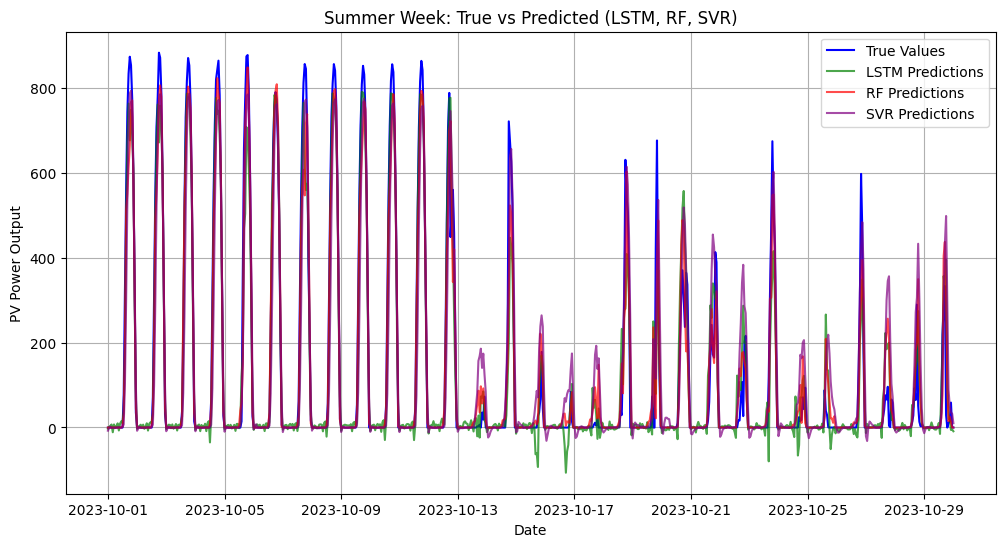

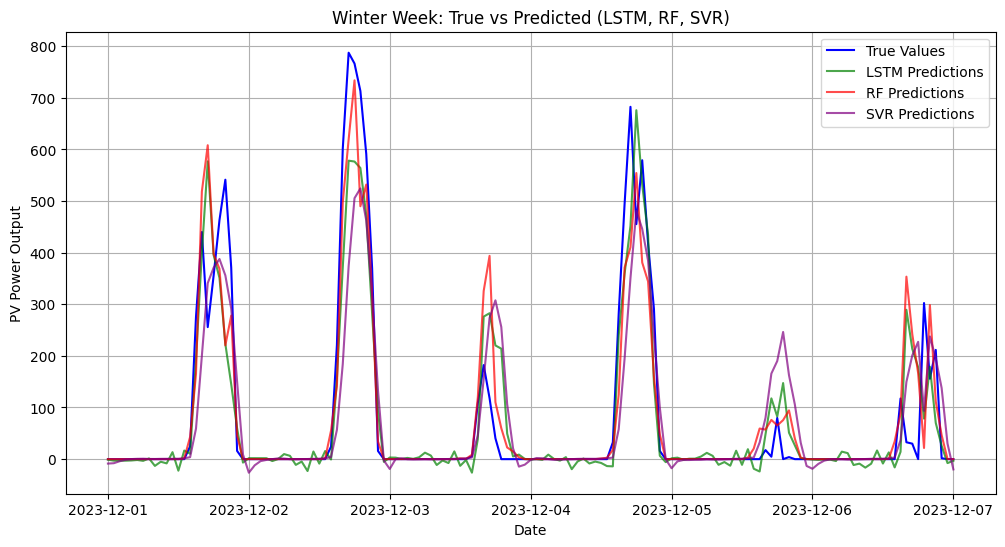

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Prepare data function (used by all models)
def prepare_data(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:(i + n_steps_in), 1:])  # Features (exclude first column)
        y.append(data[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0])  # Target (first column)
    return np.array(X), np.array(y)

# LSTM Prediction
def lstm_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):
    # Convert the dataframe to a NumPy array and prepare data
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define the LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps_in, X.shape[2])),
        Dense(n_steps_out)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

    # Train the model
    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Return predictions and y_test
    return predictions, y_test


# Random Forest Prediction
def rf_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):
    # Convert the dataframe to a NumPy array and prepare data
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Flatten for Random Forest
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Define and train RF model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_flat, y_train)

    # Make predictions
    predictions = rf.predict(X_test_flat)

    # Return predictions and y_test
    return predictions, y_test


# Support Vector Regression (SVR) Prediction
def svr_prediction(filename, n_steps_in, n_steps_out, n_epochs, batch_size):
    # Convert the dataframe to a NumPy array and prepare data
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Flatten for SVR
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Define and train SVR model
    svr = SVR(kernel='rbf')
    svr.fit(X_train_flat, y_train[:, 0])  # Only fit the first step of target

    # Make predictions and replicate across all steps
    predictions = np.tile(svr.predict(X_test_flat)[:, np.newaxis], (1, y_train.shape[1]))

    # Return predictions and y_test
    return predictions, y_test

# Function to plot all three model predictions vs actual values for a specific date range
def compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_index, test_index_start, start_date, end_date, title):
    # Convert the date range into an index slice
    mask = (df_index >= start_date) & (df_index <= end_date)

    # Check if the mask is valid
    if not mask.any():
        print(f"No data found between {start_date} and {end_date}.")
        return

    # Extract relevant date indices
    relevant_dates = df_index[mask]
    start_idx = np.where(df_index == relevant_dates[0])[0][0] - test_index_start
    end_idx = np.where(df_index == relevant_dates[-1])[0][0] - test_index_start + 1

    # Ensure the indices are within bounds
    if start_idx < 0 or end_idx > len(y_test):
        print("Index range exceeds the length of the test data.")
        return

    # Extract true and predicted values for the selected range
    y_true_week = y_test[start_idx:end_idx, 0]  # First step (0) for true values
    lstm_week = lstm_preds[start_idx:end_idx, 0]
    rf_week = rf_preds[start_idx:end_idx, 0]
    svr_week = svr_preds[start_idx:end_idx, 0]

    # Plot true values and predictions from all three models
    plt.figure(figsize=(12, 6))
    plt.plot(relevant_dates, y_true_week, label='True Values', color='blue')
    plt.plot(relevant_dates, lstm_week, label='LSTM Predictions', color='green', alpha=0.7)
    plt.plot(relevant_dates, rf_week, label='RF Predictions', color='red', alpha=0.7)
    plt.plot(relevant_dates, svr_week, label='SVR Predictions', color='purple', alpha=0.7)
    plt.title(f'{title}: True vs Predicted (LSTM, RF, SVR)')
    plt.xlabel('Date')
    plt.ylabel('PV Power Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example function to call for comparing summer and winter weeks
def compare_summer_winter_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_index, test_index_start):
    # Summer week
    summer_start = '2023-10-01'
    summer_end = '2023-10-30'
    compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_index, test_index_start, summer_start, summer_end, title="Summer Week")

    # Winter week
    winter_start = '2023-12-01'
    winter_end = '2023-12-07'
    compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_index, test_index_start, winter_start, winter_end, title="Winter Week")

# Function to calculate metrics
def calculate_metrics(y_test, predictions, n_steps_out, model_name):
    mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - RMSE: {rmse}")

    # Step-wise MAE and RMSE
    for i in range(n_steps_out):
        step_mae = mean_absolute_error(y_test[:, i], predictions[:, i])
        step_rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
        print(f"{model_name} Step {i+1} - MAE: {step_mae}, RMSE: {step_rmse}")

# Function to plot predictions vs true values for a specific date range
def plot_week_comparison(y_test, predictions, df_index, test_index_start, model_name):
    summer_start = '2023-10-01'
    summer_end = '2023-10-30'
    winter_start = '2023-12-01'
    winter_end = '2023-12-07'

    plot_for_range(y_test, predictions, df_index, test_index_start, summer_start, summer_end, f"{model_name} - Summer Week")
    plot_for_range(y_test, predictions, df_index, test_index_start, winter_start, winter_end, f"{model_name} - Winter Week")

# Helper function for plotting in specific ranges
def plot_for_range(y_test, predictions, df_index, test_index_start, start_date, end_date, title):
    mask = (df_index >= start_date) & (df_index <= end_date)
    if not mask.any():
        print(f"No data found between {start_date} and {end_date}.")
        return

    relevant_dates = df_index[mask]
    start_idx = np.where(df_index == relevant_dates[0])[0][0] - test_index_start
    end_idx = np.where(df_index == relevant_dates[-1])[0][0] - test_index_start + 1

    if start_idx < 0 or end_idx > len(y_test):
        print("Index range exceeds the length of the test data.")
        return

    y_true_week = y_test[start_idx:end_idx, 0]
    y_pred_week = predictions[start_idx:end_idx, 0]

    plt.figure(figsize=(12, 6))
    plt.plot(relevant_dates, y_true_week.flatten(), label='True Values (Step 1)', color='b')
    plt.plot(relevant_dates, y_pred_week.flatten(), label='Predictions (Step 1)', color='r', alpha=0.7)
    plt.title(f'{title}: Target vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('PV Power Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the model training and prediction functions for LSTM, RF, and SVR
lstm_preds, y_test = lstm_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)
rf_preds, _ = rf_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)
svr_preds, _ = svr_prediction('combined_variables.csv', n_steps_in=12, n_steps_out=6, n_epochs=100, batch_size=32)

# Assuming df.index is your dataframe's datetime index
train_data_length = len(df.index) - len(y_test)

# Call the comparison function for both summer and winter weeks
compare_summer_winter_all_models(y_test, lstm_preds, rf_preds, svr_preds, df.index, train_data_length)



forecasting of PV

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 54458.3984 - val_loss: 24266.3594
Epoch 2/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25637.0293 - val_loss: 23108.4102
Epoch 3/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24096.4492 - val_loss: 21917.7461
Epoch 4/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22964.4844 - val_loss: 22400.5801
Epoch 5/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22562.0918 - val_loss: 22090.2969
Epoch 6/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22445.0020 - val_loss: 21214.8789
Epoch 7/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21641.9883 - val_loss: 20883.1836
Epoch 8/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21713.6836 - val_loss: 20787.9941
Epoch 9/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21400.2871 - val_loss: 20248.1230
Epoch 10/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21337.5312 - val_loss: 19857.5781
Epoch 11/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


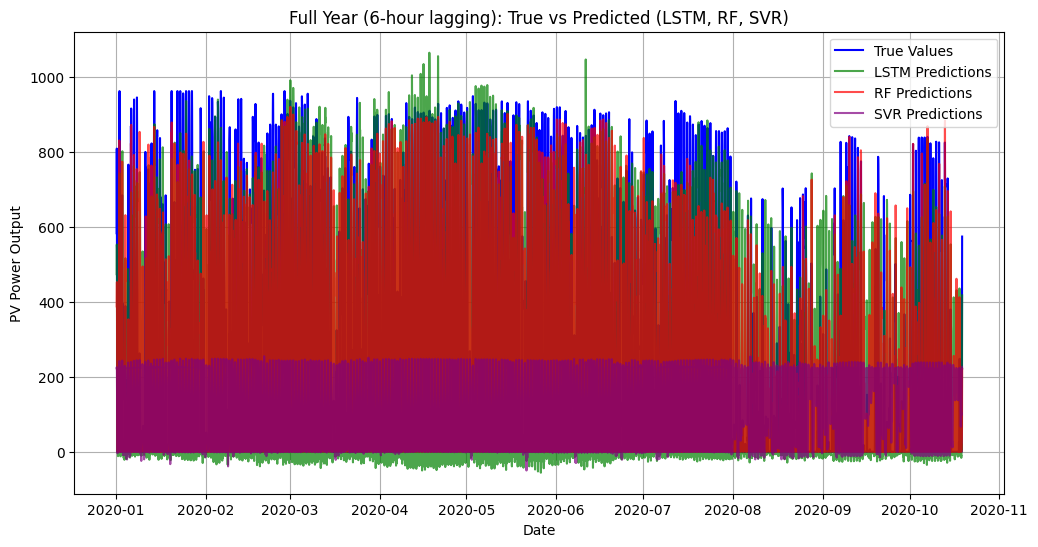

LSTM - MAE: 72.34333470491241
LSTM - RMSE: 134.3035034078751
LSTM Step 1 - MAE: 72.77110550498114, RMSE: 137.61762276410272
LSTM Step 2 - MAE: 71.15768653152321, RMSE: 136.91739088662504
LSTM Step 3 - MAE: 71.16703201147409, RMSE: 135.37705828661154
LSTM Step 4 - MAE: 72.5948999601751, RMSE: 134.17981374963983
LSTM Step 5 - MAE: 71.9254559804701, RMSE: 133.19993354368236
LSTM Step 6 - MAE: 72.33216511038998, RMSE: 133.42563170484613
LSTM Step 7 - MAE: 73.17618379872083, RMSE: 133.95894630347573
LSTM Step 8 - MAE: 73.19375999572733, RMSE: 133.77946631273772
LSTM Step 9 - MAE: 71.95659881835495, RMSE: 132.82925510570132
LSTM Step 10 - MAE: 71.68989748142832, RMSE: 132.0644247177134
LSTM Step 11 - MAE: 71.63234948948885, RMSE: 132.8922357847046
LSTM Step 12 - MAE: 74.52288177621489, RMSE: 135.2829773753162
RF - MAE: 64.79171214393564
RF - RMSE: 131.7030314345035
RF Step 1 - MAE: 64.05343044330986, RMSE: 131.24022978238335
RF Step 2 - MAE: 65.08999109307516, RMSE: 133.32906782670648
RF Ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - loss: 197924.7969 - val_loss: 217253.4062
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 208147.4844 - val_loss: 213589.5156
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 201842.6094 - val_loss: 209145.2812
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 191501.8750 - val_loss: 204851.7031
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 198888.1406 - val_loss: 199113.7969
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 190457.6250 - val_loss: 197753.5000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 185319.4844 - val_loss: 196602.1719
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 183595.9375 - val_loss: 193975.8906
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 184312.2812 - val_loss: 183249.6094
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 169588.1719 - val_loss: 170755.3281
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 158256.5469

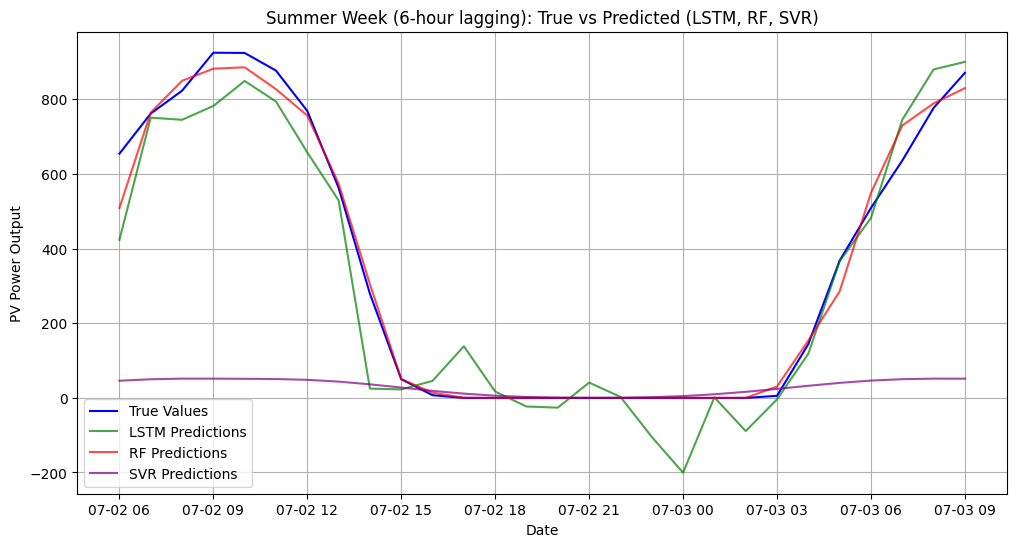

LSTM - MAE: 62.18633442951856
LSTM - RMSE: 83.60656348235074
LSTM Step 1 - MAE: 72.70291854653223, RMSE: 99.85533158140844
LSTM Step 2 - MAE: 65.23721663821263, RMSE: 76.61146387358151
LSTM Step 3 - MAE: 42.97842244532626, RMSE: 55.30400801666582
LSTM Step 4 - MAE: 57.468645250747564, RMSE: 70.77581849531198
LSTM Step 5 - MAE: 58.480412908017584, RMSE: 74.0841985128075
LSTM Step 6 - MAE: 81.83901542134272, RMSE: 107.95689169563892
LSTM Step 7 - MAE: 64.38820074413199, RMSE: 80.4900068973348
LSTM Step 8 - MAE: 73.77286647897553, RMSE: 95.22602452256736
LSTM Step 9 - MAE: 47.76590864361021, RMSE: 65.03703872501156
LSTM Step 10 - MAE: 72.21006135496289, RMSE: 110.20005855450678
LSTM Step 11 - MAE: 54.68394351764256, RMSE: 78.01722943766309
LSTM Step 12 - MAE: 54.70840120472071, RMSE: 69.4419381082234
RF - MAE: 26.547764877449243
RF - RMSE: 43.06573070402408
RF Step 1 - MAE: 23.844372636333166, RMSE: 41.618095599091745
RF Step 2 - MAE: 21.61314340188451, RMSE: 33.59040823959746
RF Step 3 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - loss: 45024.8516 - val_loss: 104819.9375
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 41363.6914 - val_loss: 104370.7734
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 46281.9141 - val_loss: 103834.1094
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 39823.9453 - val_loss: 103237.8125
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 43416.5469 - val_loss: 102342.8125
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40006.2148 - val_loss: 100493.2500
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44384.7930 - val_loss: 96790.6172
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 35041.1680 - val_loss: 91012.7188
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35250.1680 - val_loss: 83753.3672
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32812.0391 - val_loss: 78106.3125
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32798.7500 - val_loss: 73

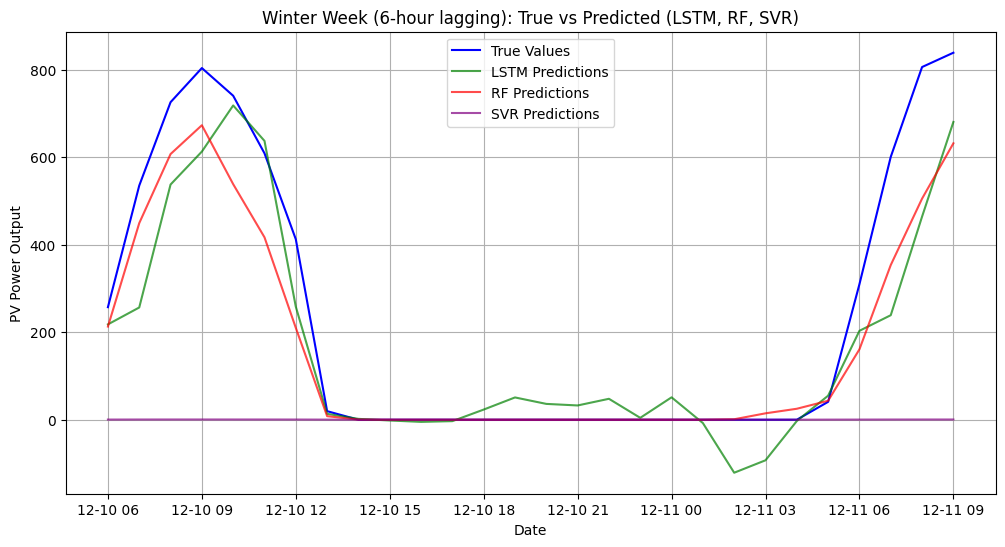

LSTM - MAE: 75.59237780201963
LSTM - RMSE: 124.17786789937568
LSTM Step 1 - MAE: 84.7719031750167, RMSE: 132.91628291300017
LSTM Step 2 - MAE: 75.31428224654637, RMSE: 109.6823730124211
LSTM Step 3 - MAE: 78.97779752107188, RMSE: 143.39811340389116
LSTM Step 4 - MAE: 102.0436875250593, RMSE: 155.7662655340349
LSTM Step 5 - MAE: 120.26861603503845, RMSE: 192.31023781844993
LSTM Step 6 - MAE: 86.55479127637419, RMSE: 135.62506287919953
LSTM Step 7 - MAE: 64.83602373854457, RMSE: 101.18228229313205
LSTM Step 8 - MAE: 77.82616259342771, RMSE: 101.47933199165413
LSTM Step 9 - MAE: 40.703451654413286, RMSE: 56.24236598386207
LSTM Step 10 - MAE: 42.71228372993363, RMSE: 57.391816014649365
LSTM Step 11 - MAE: 57.451510057347704, RMSE: 86.02902510167078
LSTM Step 12 - MAE: 75.6480240714618, RMSE: 144.03920693338097
RF - MAE: 62.23113547417859
RF - RMSE: 110.73093269785574
RF Step 1 - MAE: 69.11964312028262, RMSE: 116.03051908294798
RF Step 2 - MAE: 76.30572818109383, RMSE: 124.17943542761269
RF

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 53088.6758 - val_loss: 22755.3301
Epoch 2/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23938.8379 - val_loss: 22050.2168
Epoch 3/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23396.8359 - val_loss: 21876.7363
Epoch 4/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22587.7207 - val_loss: 20651.0195
Epoch 5/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22038.4414 - val_loss: 20472.7812
Epoch 6/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22024.4688 - val_loss: 20267.2871
Epoch 7/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21617.3066 - val_loss: 21114.5586
Epoch 8/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22007.3711 - val_loss: 20382.1504
Epoch 9/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21571.4980 - val_loss: 20474.4512
Epoch 10/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21732.4766 - val_loss: 19977.2266
Epoch 11/100
701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

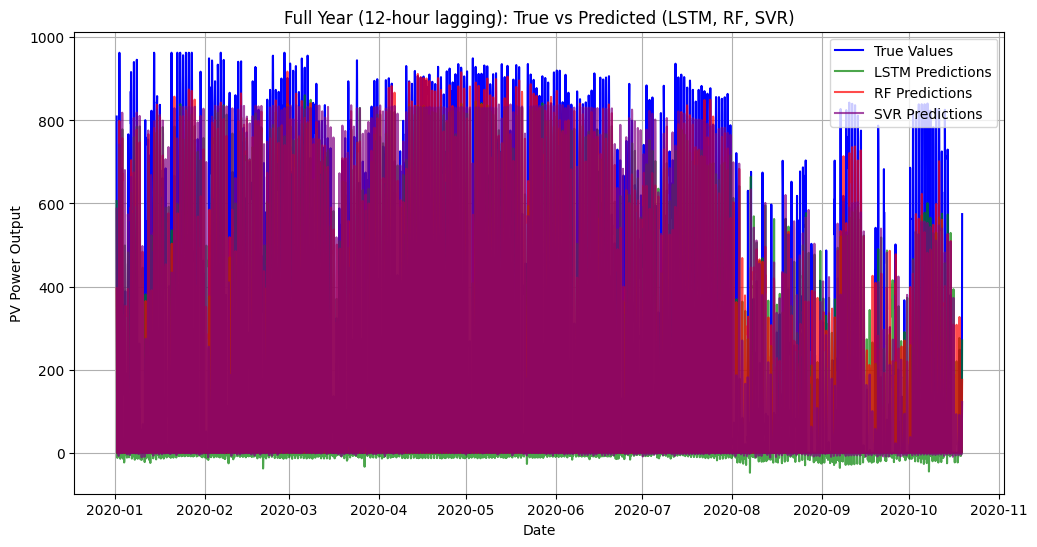

LSTM - MAE: 73.9981191730386
LSTM - RMSE: 136.92805311421992
LSTM Step 1 - MAE: 76.57848011332776, RMSE: 136.76606542204615
LSTM Step 2 - MAE: 74.5963574971731, RMSE: 135.9295580146399
LSTM Step 3 - MAE: 75.25961373304216, RMSE: 135.42711898169935
LSTM Step 4 - MAE: 74.05243119560662, RMSE: 135.6303838810666
LSTM Step 5 - MAE: 74.27766733486386, RMSE: 136.4321683470975
LSTM Step 6 - MAE: 76.2765651261978, RMSE: 137.62910124936687
LSTM Step 7 - MAE: 74.97612899415918, RMSE: 138.0172127172078
LSTM Step 8 - MAE: 74.05288075882946, RMSE: 137.7832081510837
LSTM Step 9 - MAE: 72.56876231803741, RMSE: 137.26105388413353
LSTM Step 10 - MAE: 71.46155361654444, RMSE: 137.35796661673353
LSTM Step 11 - MAE: 71.47746158310792, RMSE: 137.32462132976542
LSTM Step 12 - MAE: 72.39952780557358, RMSE: 137.54731811363965
RF - MAE: 65.08289292357975
RF - RMSE: 132.05627212553566
RF Step 1 - MAE: 63.63284653826921, RMSE: 130.60963811981173
RF Step 2 - MAE: 63.949257007244604, RMSE: 131.04113322542358
RF Ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - loss: 237194.0312 - val_loss: 221017.5156
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 225969.5469 - val_loss: 216785.6875
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 227276.0000 - val_loss: 213891.6875
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 228335.0781 - val_loss: 211420.9844
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 219038.1719 - val_loss: 209010.5938
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 223300.5625 - val_loss: 206126.5156
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 213114.6250 - val_loss: 203873.3594
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 215383.4688 - val_loss: 201031.0938
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 212048.7500 - val_loss: 199176.1562
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 199175.5469 - val_loss: 194759.0938
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 209461.5625

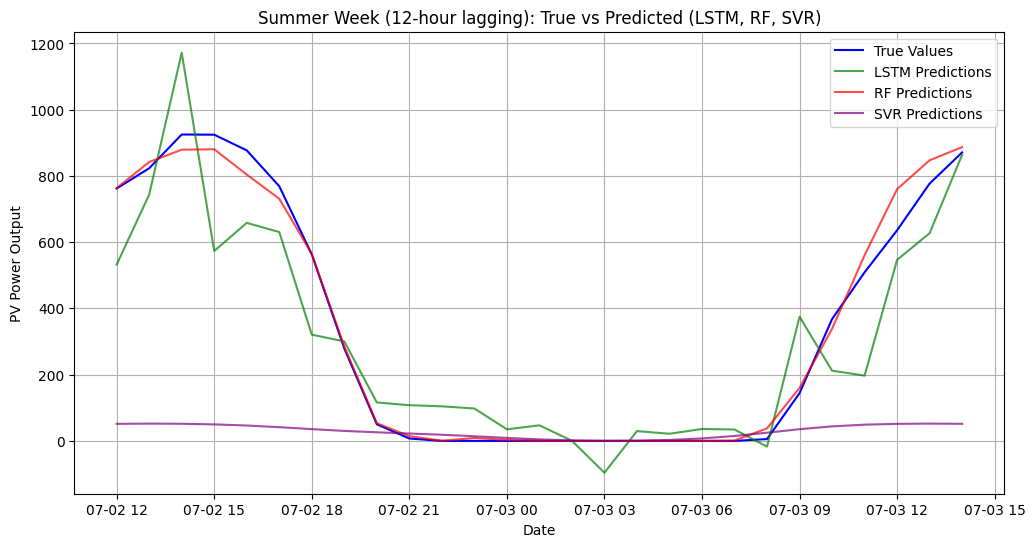

LSTM - MAE: 159.3384032695337
LSTM - RMSE: 217.97690350093188
LSTM Step 1 - MAE: 117.22890546934468, RMSE: 152.39761533550205
LSTM Step 2 - MAE: 110.37193682806463, RMSE: 143.58508897484313
LSTM Step 3 - MAE: 192.56617185793715, RMSE: 258.94265168292344
LSTM Step 4 - MAE: 205.5485768010536, RMSE: 249.1136191459852
LSTM Step 5 - MAE: 139.6221540089767, RMSE: 188.732980441516
LSTM Step 6 - MAE: 149.28456872979427, RMSE: 203.52314341498828
LSTM Step 7 - MAE: 144.19274818296074, RMSE: 194.08504013759043
LSTM Step 8 - MAE: 140.5436742099572, RMSE: 190.68259568167838
LSTM Step 9 - MAE: 118.29987812544586, RMSE: 148.05798638307044
LSTM Step 10 - MAE: 243.85011007030903, RMSE: 338.0083005570068
LSTM Step 11 - MAE: 212.62107858072793, RMSE: 269.73303535399504
LSTM Step 12 - MAE: 137.93103636983255, RMSE: 192.92281002075904
RF - MAE: 28.3550313678323
RF - RMSE: 44.908008806568105
RF Step 1 - MAE: 21.908050030011424, RMSE: 36.92690408047199
RF Step 2 - MAE: 27.153169518618625, RMSE: 42.6053848131

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - loss: 48673.0391 - val_loss: 99519.2734
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48301.8281 - val_loss: 99514.1172
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44264.9844 - val_loss: 98353.9297
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48350.8125 - val_loss: 96279.9688
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49979.3906 - val_loss: 98765.8047
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50597.4531 - val_loss: 95255.8750
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46154.1797 - val_loss: 94326.7969
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 46447.3828 - val_loss: 93466.1094
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47723.4844 - val_loss: 92158.6172
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40178.3086 - val_loss: 91624.6250
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 45319.4688 - val_loss: 89289.67

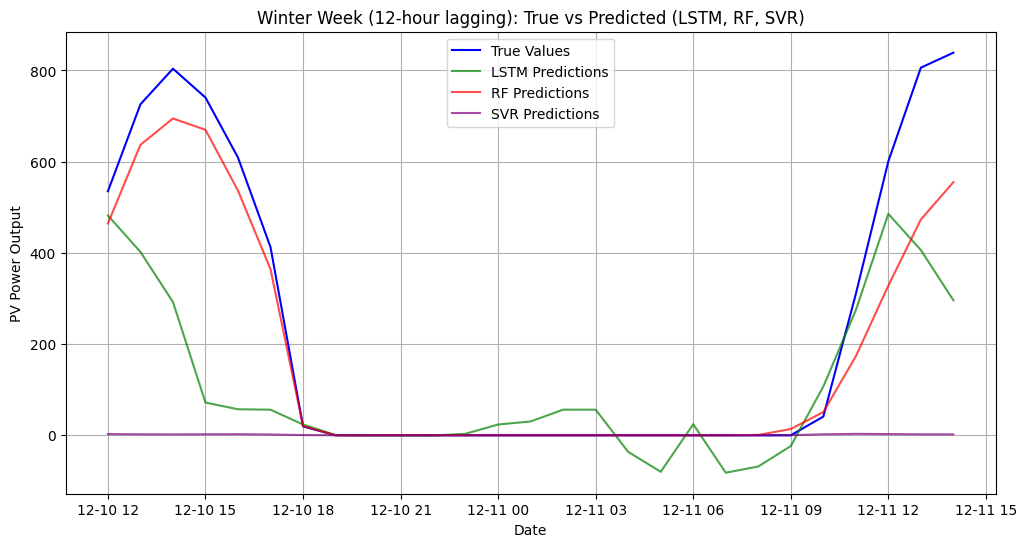

LSTM - MAE: 117.76249782357014
LSTM - RMSE: 205.77916332657253
LSTM Step 1 - MAE: 152.43939566920292, RMSE: 254.6217302512714
LSTM Step 2 - MAE: 130.8523462324761, RMSE: 225.62702351005856
LSTM Step 3 - MAE: 124.1287414183372, RMSE: 202.65596386025163
LSTM Step 4 - MAE: 75.07303573651255, RMSE: 139.37423636894337
LSTM Step 5 - MAE: 65.15641029513566, RMSE: 115.03278135442092
LSTM Step 6 - MAE: 95.28778142413249, RMSE: 163.6547383118958
LSTM Step 7 - MAE: 106.8596628651243, RMSE: 167.38925323308175
LSTM Step 8 - MAE: 127.8440483705477, RMSE: 213.48428856380107
LSTM Step 9 - MAE: 143.67048596554162, RMSE: 252.31949097399612
LSTM Step 10 - MAE: 121.60985689352891, RMSE: 196.1042151539774
LSTM Step 11 - MAE: 117.24345386595306, RMSE: 209.60984006272008
LSTM Step 12 - MAE: 152.98475514634927, RMSE: 268.771241969177
RF - MAE: 56.140993118373856
RF - RMSE: 103.60861293690647
RF Step 1 - MAE: 56.004034807852015, RMSE: 109.25315839247459
RF Step 2 - MAE: 60.76663460242832, RMSE: 111.99884138659

NameError: name 'y_test' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Prepare data function (used by all models)
def prepare_data(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:(i + n_steps_in), 1:])  # Features (exclude first column)
        y.append(data[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0])  # Target (first column)
    return np.array(X), np.array(y)

# Apply lagging to the input variables
def apply_lagging(df, lag_hours):
    df_lagged = df.copy()
    for column in df.columns[1:]:  # Apply lagging to all columns except the target
        df_lagged[column] = df[column].shift(lag_hours)
    return df_lagged.dropna()  # Drop rows with NaN values after lagging

# LSTM Prediction
def lstm_prediction(df, n_steps_in, n_steps_out, n_epochs, batch_size):
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps_in, X.shape[2])),
        Dense(n_steps_out)
    ])
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    predictions = model.predict(X_test)
    return predictions, y_test

# Random Forest Prediction
def rf_prediction(df, n_steps_in, n_steps_out):
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_flat, y_train)

    predictions = rf.predict(X_test_flat)
    return predictions, y_test

# SVR Prediction
def svr_prediction(df, n_steps_in, n_steps_out):
    data = df.values
    X, y = prepare_data(data, n_steps_in, n_steps_out)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    svr = SVR(kernel='rbf')
    svr.fit(X_train_flat, y_train[:, 0])  # Only fit the first step of target

    predictions = np.tile(svr.predict(X_test_flat)[:, np.newaxis], (1, y_train.shape[1]))
    return predictions, y_test

# Function to plot all three model predictions vs actual values for a specific date range
def compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_index, test_index_start, start_date, end_date, title):
    mask = (df_index >= start_date) & (df_index <= end_date)

    if not mask.any():
        print(f"No data found between {start_date} and {end_date}.")
        return

    relevant_dates = df_index[mask]
    start_idx = np.where(df_index == relevant_dates[0])[0][0] - test_index_start
    end_idx = np.where(df_index == relevant_dates[-1])[0][0] - test_index_start + 1

    # Ensure the indices are within bounds of y_test
    if start_idx < 0:
        start_idx = 0
    if end_idx > len(y_test):
        end_idx = len(y_test)

    # Extract true and predicted values for the selected range
    y_true_week = y_test[start_idx:end_idx, 0]
    lstm_week = lstm_preds[start_idx:end_idx, 0]
    rf_week = rf_preds[start_idx:end_idx, 0]
    svr_week = svr_preds[start_idx:end_idx, 0]

    # Adjust relevant_dates length to match y_test indices (if they differ)
    relevant_dates = relevant_dates[:len(y_true_week)]

    plt.figure(figsize=(12, 6))
    plt.plot(relevant_dates, y_true_week, label='True Values', color='blue')
    plt.plot(relevant_dates, lstm_week, label='LSTM Predictions', color='green', alpha=0.7)
    plt.plot(relevant_dates, rf_week, label='RF Predictions', color='red', alpha=0.7)
    plt.plot(relevant_dates, svr_week, label='SVR Predictions', color='purple', alpha=0.7)
    plt.title(f'{title}: True vs Predicted (LSTM, RF, SVR)')
    plt.xlabel('Date')
    plt.ylabel('PV Power Output')
    plt.legend()
    plt.grid(True)
    plt.show()


# Function to calculate metrics
def calculate_metrics(y_test, predictions, n_steps_out, model_name):
    mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - RMSE: {rmse}")

    for i in range(n_steps_out):
        step_mae = mean_absolute_error(y_test[:, i], predictions[:, i])
        step_rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
        print(f"{model_name} Step {i+1} - MAE: {step_mae}, RMSE: {step_rmse}")

# Run experiments with different lagging configurations
def run_experiment(df, lag_hours, n_steps_in, n_steps_out, n_epochs, batch_size, title, start_date, end_date):
    df_lagged = apply_lagging(df, lag_hours)

    # LSTM prediction
    lstm_preds, y_test = lstm_prediction(df_lagged, n_steps_in, n_steps_out, n_epochs, batch_size)

    # RF prediction
    rf_preds, _ = rf_prediction(df_lagged, n_steps_in, n_steps_out)

    # SVR prediction
    svr_preds, _ = svr_prediction(df_lagged, n_steps_in, n_steps_out)

    train_data_length = len(df_lagged.index) - len(y_test)
    compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_lagged.index, train_data_length, start_date, end_date, title)

    calculate_metrics(y_test, lstm_preds, n_steps_out, "LSTM")
    calculate_metrics(y_test, rf_preds, n_steps_out, "RF")
    calculate_metrics(y_test, svr_preds, n_steps_out, "SVR")

# Run the experiment for the full year, summer week, and winter week with 6-hour and 12-hour lagging
summer_start = '2023-07-02'
summer_end = '2023-07-09'
winter_start = '2023-12-10'
winter_end = '2023-12-17'

# Full year
df_full_year = df
df_summer_week = df[(df.index >= summer_start) & (df.index <= summer_end)]
df_winter_week = df[(df.index >= winter_start) & (df.index <= winter_end)]

run_experiment(df_full_year, lag_hours=6, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Full Year (6-hour lagging)", start_date=df_full_year.index[0], end_date=df_full_year.index[-1])
run_experiment(df_summer_week, lag_hours=6, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Summer Week (6-hour lagging)", start_date=summer_start, end_date=summer_end)
run_experiment(df_winter_week, lag_hours=6, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Winter Week (6-hour lagging)", start_date=winter_start, end_date=winter_end)

run_experiment(df_full_year, lag_hours=12, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Full Year (12-hour lagging)", start_date=df_full_year.index[0], end_date=df_full_year.index[-1])
run_experiment(df_summer_week, lag_hours=12, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Summer Week (12-hour lagging)", start_date=summer_start, end_date=summer_end)
run_experiment(df_winter_week, lag_hours=12, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Winter Week (12-hour lagging)", start_date=winter_start, end_date=winter_end)


In [ ]:
# Print the start and end date of df_full_year
print(f"Full year data starts from: {df_full_year.index[0]}")
print(f"Full year data ends at: {df_full_year.index[-1]}")


Full year data starts from: 2020-01-01 00:00:00
Full year data ends at: 2023-12-31 23:00:00


This the the Final PV prediction


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 54915.5586 - val_loss: 21950.5605
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25440.1211 - val_loss: 21582.9258
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23853.8027 - val_loss: 20369.1758
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22930.9121 - val_loss: 20072.1543
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24142.0234 - val_loss: 20656.3574
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22681.4727 - val_loss: 19068.8359
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21867.1445 - val_loss: 19195.9512
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21748.4805 - val_loss: 19560.2734
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21834.4043 - val_loss: 18631.4707
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22030.8945 - val_loss: 18797.7734
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

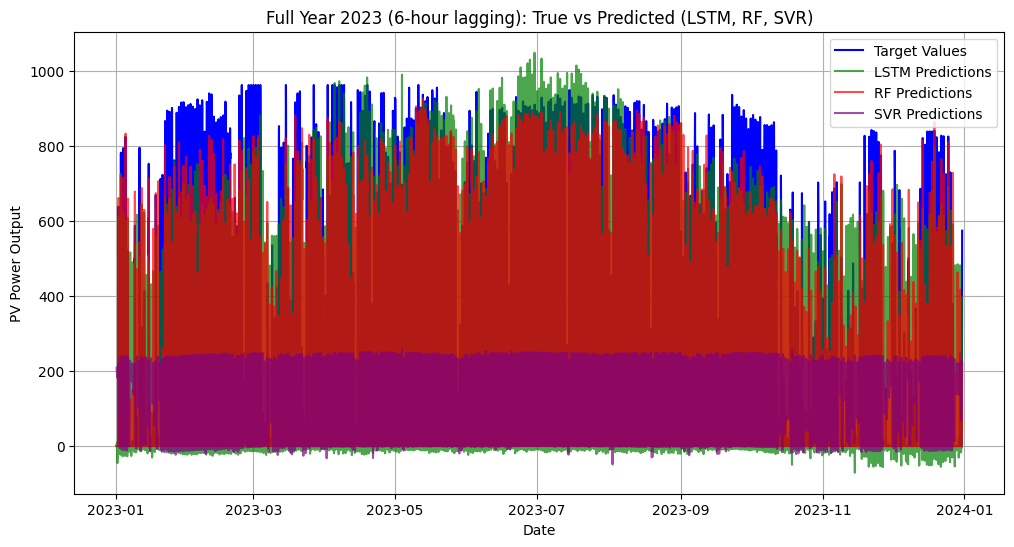

LSTM - MAE: 74.99370208341114
LSTM - RMSE: 140.54683800465213
LSTM Step 1 - MAE: 75.01863261315432, RMSE: 142.27705615608505
LSTM Step 2 - MAE: 73.54328610690926, RMSE: 142.8927782533582
LSTM Step 3 - MAE: 73.33298996132282, RMSE: 142.28792128641297
LSTM Step 4 - MAE: 74.61819673035572, RMSE: 141.7320068645151
LSTM Step 5 - MAE: 75.82198903168515, RMSE: 141.9697790641742
LSTM Step 6 - MAE: 77.06206817555778, RMSE: 142.29019284451107
LSTM Step 7 - MAE: 76.63145036065924, RMSE: 140.82752752119615
LSTM Step 8 - MAE: 75.97007293671494, RMSE: 139.73903790821106
LSTM Step 9 - MAE: 74.28855981429726, RMSE: 138.27707151945037
LSTM Step 10 - MAE: 73.12965513740271, RMSE: 137.23594691529476
LSTM Step 11 - MAE: 74.31496116087995, RMSE: 137.34550751589282
LSTM Step 12 - MAE: 76.19256297199433, RMSE: 139.52308962669701
RF - MAE: 66.16250812383329
RF - RMSE: 135.56832311856536
RF Step 1 - MAE: 65.18251491337024, RMSE: 134.05942114015957
RF Step 2 - MAE: 66.24208072113376, RMSE: 135.81330899025264
RF

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 53883.2812 - val_loss: 25006.4395
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 27603.4688 - val_loss: 23743.7031
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26179.9141 - val_loss: 21342.7188
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24239.0703 - val_loss: 20074.8613
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23040.2852 - val_loss: 20122.2676
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24499.6406 - val_loss: 20465.4434
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23907.5293 - val_loss: 19812.2559
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23331.4746 - val_loss: 22534.7852
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23661.8008 - val_loss: 19875.6523
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23010.1387 - val_loss: 19098.5430
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

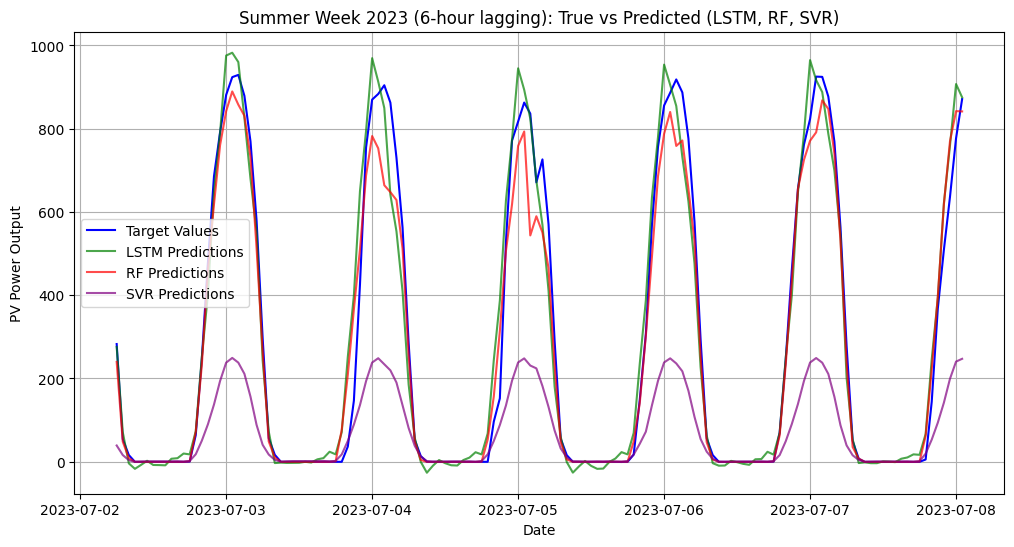

LSTM - MAE: 38.5465894812137
LSTM - RMSE: 62.96640408294366
LSTM Step 1 - MAE: 43.71640287918789, RMSE: 71.414503090981
LSTM Step 2 - MAE: 45.228328071048544, RMSE: 68.61708033439417
LSTM Step 3 - MAE: 42.92957387125689, RMSE: 62.79777583068645
LSTM Step 4 - MAE: 39.04787736473937, RMSE: 57.39304305674897
LSTM Step 5 - MAE: 34.69177503478816, RMSE: 56.89988505717901
LSTM Step 6 - MAE: 34.81356715450754, RMSE: 56.42563452513062
LSTM Step 7 - MAE: 36.85144788748028, RMSE: 58.051538326750055
LSTM Step 8 - MAE: 39.216972664581576, RMSE: 63.58486413359507
LSTM Step 9 - MAE: 38.58890585993327, RMSE: 66.72410475312209
LSTM Step 10 - MAE: 37.8755879096884, RMSE: 63.47727807346858
LSTM Step 11 - MAE: 34.8270850480426, RMSE: 64.69698823287554
LSTM Step 12 - MAE: 34.77155002930987, RMSE: 63.48009954698031
RF - MAE: 33.83518043488178
RF - RMSE: 59.97670879001617
RF Step 1 - MAE: 36.56878585989926, RMSE: 66.41307068561049
RF Step 2 - MAE: 36.91494207626361, RMSE: 65.00982455044281
RF Step 3 - MAE: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 54192.8359 - val_loss: 22740.0742
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26299.1445 - val_loss: 21670.8262
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25209.6758 - val_loss: 21359.3730
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24066.3555 - val_loss: 21365.9883
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24078.2734 - val_loss: 21361.2539
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23234.9199 - val_loss: 21882.2090
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22984.7520 - val_loss: 19460.8906
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22577.7441 - val_loss: 19867.0449
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22195.9141 - val_loss: 19240.4453
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22144.5527 - val_loss: 19130.2676
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

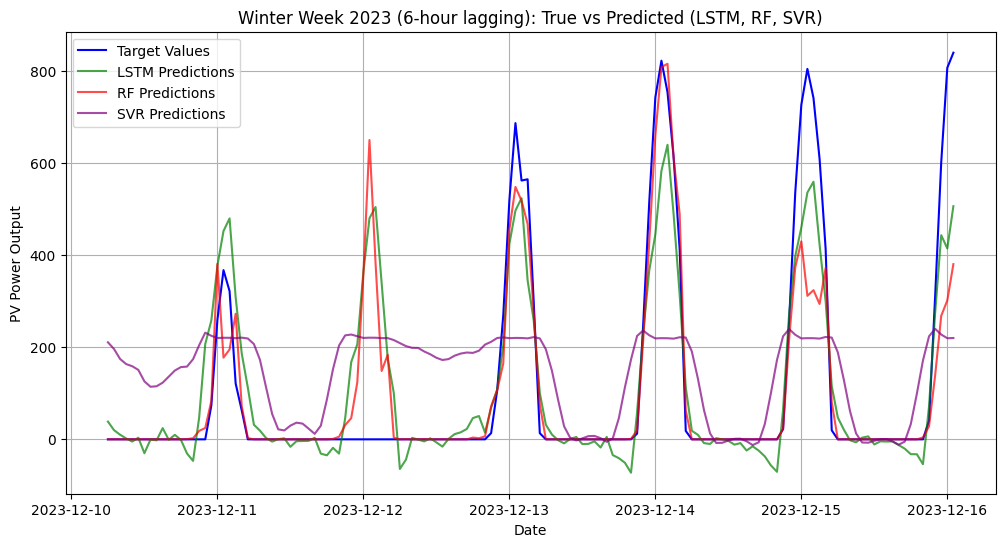

LSTM - MAE: 68.8930318398952
LSTM - RMSE: 124.42685236479856
LSTM Step 1 - MAE: 67.3807548396735, RMSE: 118.40978248841252
LSTM Step 2 - MAE: 62.6097769917974, RMSE: 122.23908602478862
LSTM Step 3 - MAE: 69.60103120711779, RMSE: 126.44636302025039
LSTM Step 4 - MAE: 70.97089006703924, RMSE: 121.7126848190905
LSTM Step 5 - MAE: 70.94163145231319, RMSE: 118.32849319448242
LSTM Step 6 - MAE: 64.4989130882196, RMSE: 114.01553805449426
LSTM Step 7 - MAE: 62.169450490117185, RMSE: 115.28735860691874
LSTM Step 8 - MAE: 65.511299717283, RMSE: 124.89146017591216
LSTM Step 9 - MAE: 70.59072790005314, RMSE: 129.34444663142102
LSTM Step 10 - MAE: 70.36337127665897, RMSE: 128.73299582708796
LSTM Step 11 - MAE: 73.67368535273233, RMSE: 133.0115829537539
LSTM Step 12 - MAE: 78.40484969573707, RMSE: 138.32602639074958
RF - MAE: 65.10858828054697
RF - RMSE: 135.63187460997423
RF Step 1 - MAE: 49.3918253967753, RMSE: 124.94029990508668
RF Step 2 - MAE: 56.96174218888985, RMSE: 134.69708930741962
RF Step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 57766.4961 - val_loss: 20579.4297
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24282.9590 - val_loss: 19397.1914
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23788.2402 - val_loss: 20142.2344
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22547.2188 - val_loss: 19299.1250
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22447.5176 - val_loss: 18288.8223
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21817.8828 - val_loss: 19172.8691
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21995.0996 - val_loss: 18910.2051
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21533.5430 - val_loss: 18738.8984
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21501.6816 - val_loss: 20439.7285
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 21845.4277 - val_loss: 19674.4648
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

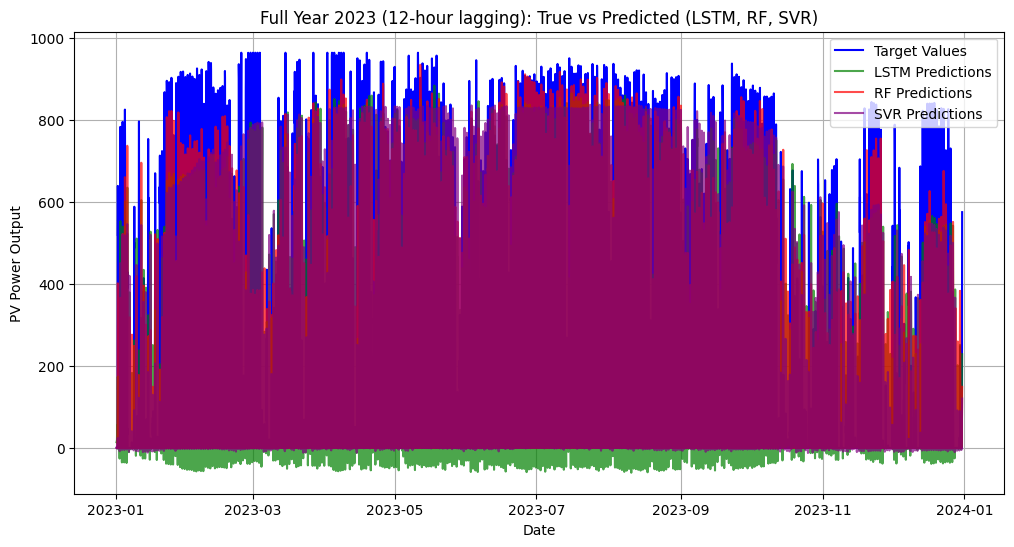

LSTM - MAE: 81.53045022551194
LSTM - RMSE: 145.08512938890226
LSTM Step 1 - MAE: 82.43190178245771, RMSE: 143.89356928537092
LSTM Step 2 - MAE: 81.18108633279418, RMSE: 142.92296551966405
LSTM Step 3 - MAE: 80.16429137075497, RMSE: 143.15378219498618
LSTM Step 4 - MAE: 81.3169341269417, RMSE: 142.89870221286597
LSTM Step 5 - MAE: 79.48126017435061, RMSE: 143.1760145585767
LSTM Step 6 - MAE: 80.9071394787058, RMSE: 144.1265760565116
LSTM Step 7 - MAE: 79.21901366959982, RMSE: 145.89729900054658
LSTM Step 8 - MAE: 82.73948367753641, RMSE: 148.26071014595655
LSTM Step 9 - MAE: 83.44392702852569, RMSE: 147.89822350181157
LSTM Step 10 - MAE: 80.58357541212857, RMSE: 145.60301689380825
LSTM Step 11 - MAE: 79.55356909613255, RMSE: 145.20471455668138
LSTM Step 12 - MAE: 87.34322055621544, RMSE: 147.82870546587762
RF - MAE: 66.6931868926715
RF - RMSE: 136.50158064779038
RF Step 1 - MAE: 65.54470245725908, RMSE: 135.64459981932734
RF Step 2 - MAE: 65.68655302575489, RMSE: 135.68241316100907
RF S

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 56302.0742 - val_loss: 20722.3711
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25592.6348 - val_loss: 19563.4824
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24523.4551 - val_loss: 19587.2910
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23588.7266 - val_loss: 19622.6289
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23504.2012 - val_loss: 19809.5762
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24215.0938 - val_loss: 19091.5918
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22758.6680 - val_loss: 19247.5352
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22567.3047 - val_loss: 18560.2051
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22275.3848 - val_loss: 18666.1055
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22970.3672 - val_loss: 19676.5137
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

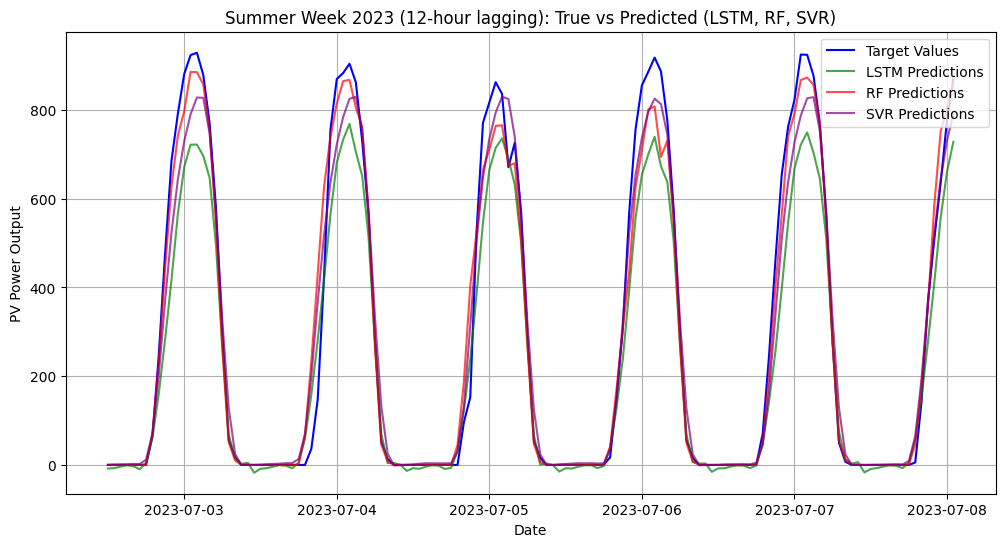

LSTM - MAE: 45.86892983314356
LSTM - RMSE: 70.3510876511735
LSTM Step 1 - MAE: 62.975196997312864, RMSE: 99.1101958385727
LSTM Step 2 - MAE: 59.551975529208285, RMSE: 91.1660666166651
LSTM Step 3 - MAE: 51.53226051375863, RMSE: 78.95355670762603
LSTM Step 4 - MAE: 53.10646142996835, RMSE: 76.9462487493944
LSTM Step 5 - MAE: 45.605319878500026, RMSE: 66.39563643759152
LSTM Step 6 - MAE: 39.967740883568254, RMSE: 59.05473989875452
LSTM Step 7 - MAE: 38.20437012398391, RMSE: 57.28741673413222
LSTM Step 8 - MAE: 37.20721103623818, RMSE: 56.98852787255446
LSTM Step 9 - MAE: 40.32957975429222, RMSE: 60.141152016566124
LSTM Step 10 - MAE: 41.801660988587535, RMSE: 60.53874718765637
LSTM Step 11 - MAE: 40.56161415931141, RMSE: 60.24298721762056
LSTM Step 12 - MAE: 39.58376670299315, RMSE: 61.370478375911176
RF - MAE: 31.6372409004682
RF - RMSE: 56.35593550611559
RF Step 1 - MAE: 30.390960984441, RMSE: 59.517714225496185
RF Step 2 - MAE: 32.512730869068555, RMSE: 61.343350851722406
RF Step 3 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 59377.2305 - val_loss: 22860.8008
Epoch 2/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 27185.7402 - val_loss: 20988.1836
Epoch 3/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25495.7852 - val_loss: 19676.5430
Epoch 4/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24686.6660 - val_loss: 19176.2852
Epoch 5/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23179.9297 - val_loss: 19732.1836
Epoch 6/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22741.6074 - val_loss: 20268.0508
Epoch 7/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22531.8809 - val_loss: 19056.7637
Epoch 8/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22682.4727 - val_loss: 18817.8105
Epoch 9/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22257.9941 - val_loss: 19186.1797
Epoch 10/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22560.9160 - val_loss: 18394.0273
Epoch 11/100
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss:

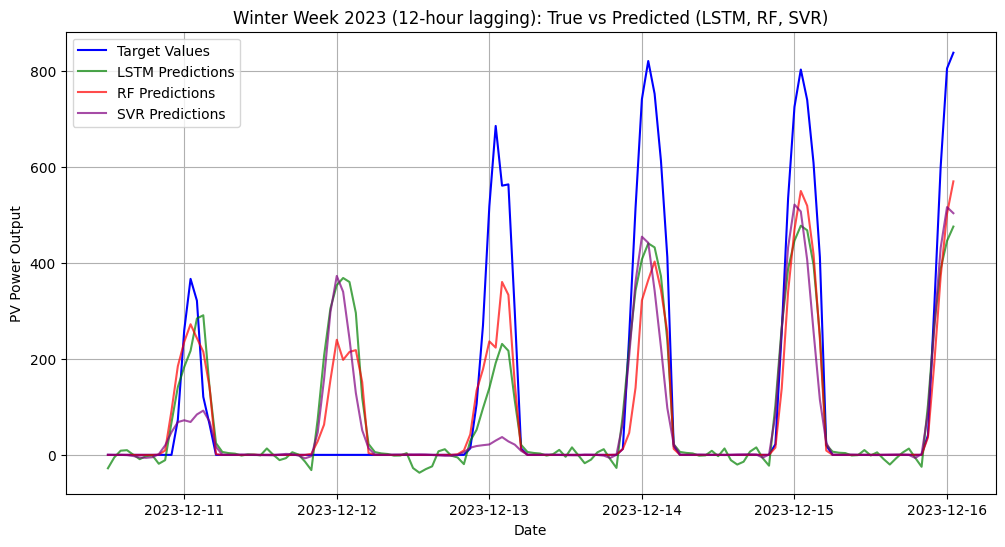

LSTM - MAE: 80.6751478309566
LSTM - RMSE: 148.23483323907914
LSTM Step 1 - MAE: 72.94779436913393, RMSE: 138.24947287879556
LSTM Step 2 - MAE: 74.55076766878467, RMSE: 144.17665086333162
LSTM Step 3 - MAE: 76.79514396158396, RMSE: 145.8324308294671
LSTM Step 4 - MAE: 78.55133162528439, RMSE: 145.5774465362488
LSTM Step 5 - MAE: 79.5925163040576, RMSE: 144.41331894990213
LSTM Step 6 - MAE: 82.66453972876297, RMSE: 147.35552016869883
LSTM Step 7 - MAE: 83.81373921782884, RMSE: 147.9008252875955
LSTM Step 8 - MAE: 80.56960991977166, RMSE: 146.2782349735301
LSTM Step 9 - MAE: 80.87854302275821, RMSE: 146.64751764782113
LSTM Step 10 - MAE: 86.3589237282697, RMSE: 153.9088946510003
LSTM Step 11 - MAE: 85.65863929491451, RMSE: 158.57917260213543
LSTM Step 12 - MAE: 85.72022513032897, RMSE: 158.56054606287765
RF - MAE: 68.3751618886192
RF - RMSE: 141.5360574353803
RF Step 1 - MAE: 59.20251574177662, RMSE: 122.99992934969295
RF Step 2 - MAE: 64.07891205420174, RMSE: 134.37746057606603
RF Step 3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Prepare data function (used by all models)
def prepare_data(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:(i + n_steps_in), 1:])  # Features (exclude first column)
        y.append(data[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0])  # Target (first column)
    return np.array(X), np.array(y)

# Apply lagging to the input variables
def apply_lagging(df, lag_hours):
    df_lagged = df.copy()
    for column in df.columns[1:]:  # Apply lagging to all columns except the target
        df_lagged[column] = df[column].shift(lag_hours)
    return df_lagged.dropna()  # Drop rows with NaN values after lagging

# LSTM Prediction
def lstm_prediction(df_train, df_test, n_steps_in, n_steps_out, n_epochs, batch_size):
    # Prepare data
    X_train, y_train = prepare_data(df_train.values, n_steps_in, n_steps_out)
    X_test, y_test = prepare_data(df_test.values, n_steps_in, n_steps_out)

    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps_in, X_train.shape[2])),
        Dense(n_steps_out)
    ])
    model.compile(optimizer='adam', loss='mse')
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

    model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    predictions = model.predict(X_test)
    return predictions, y_test

# Random Forest Prediction
def rf_prediction(df_train, df_test, n_steps_in, n_steps_out):
    X_train, y_train = prepare_data(df_train.values, n_steps_in, n_steps_out)
    X_test, y_test = prepare_data(df_test.values, n_steps_in, n_steps_out)

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_flat, y_train)

    predictions = rf.predict(X_test_flat)
    return predictions, y_test

# SVR Prediction
def svr_prediction(df_train, df_test, n_steps_in, n_steps_out):
    X_train, y_train = prepare_data(df_train.values, n_steps_in, n_steps_out)
    X_test, y_test = prepare_data(df_test.values, n_steps_in, n_steps_out)

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    svr = SVR(kernel='rbf')
    svr.fit(X_train_flat, y_train[:, 0])  # Only fit the first step of target

    predictions = np.tile(svr.predict(X_test_flat)[:, np.newaxis], (1, y_train.shape[1]))
    return predictions, y_test

# Function to plot all three model predictions vs actual values for a specific date range
def compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_index, test_index_start, start_date, end_date, title):
    mask = (df_index >= start_date) & (df_index <= end_date)

    if not mask.any():
        print(f"No data found between {start_date} and {end_date}.")
        return

    relevant_dates = df_index[mask]
    start_idx = np.where(df_index == relevant_dates[0])[0][0] - test_index_start
    end_idx = np.where(df_index == relevant_dates[-1])[0][0] - test_index_start + 1

    if start_idx < 0:
        start_idx = 0
    if end_idx > len(y_test):
        end_idx = len(y_test)

    y_true_week = y_test[start_idx:end_idx, 0]
    lstm_week = lstm_preds[start_idx:end_idx, 0]
    rf_week = rf_preds[start_idx:end_idx, 0]
    svr_week = svr_preds[start_idx:end_idx, 0]

    relevant_dates = relevant_dates[:len(y_true_week)]

    plt.figure(figsize=(12, 6))
    plt.plot(relevant_dates, y_true_week, label='Target Values', color='blue')
    plt.plot(relevant_dates, lstm_week, label='LSTM Predictions', color='green', alpha=0.7)
    plt.plot(relevant_dates, rf_week, label='RF Predictions', color='red', alpha=0.7)
    plt.plot(relevant_dates, svr_week, label='SVR Predictions', color='purple', alpha=0.7)
    plt.title(f'{title}: True vs Predicted (LSTM, RF, SVR)')
    plt.xlabel('Date')
    plt.ylabel('PV Power Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to calculate metrics
def calculate_metrics(y_test, predictions, n_steps_out, model_name):
    mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
    rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))
    print(f"{model_name} - MAE: {mae}")
    print(f"{model_name} - RMSE: {rmse}")

    for i in range(n_steps_out):
        step_mae = mean_absolute_error(y_test[:, i], predictions[:, i])
        step_rmse = np.sqrt(mean_squared_error(y_test[:, i], predictions[:, i]))
        print(f"{model_name} Step {i+1} - MAE: {step_mae}, RMSE: {step_rmse}")

# Run experiments with different lagging configurations
def run_experiment(df_train, df_test, lag_hours, n_steps_in, n_steps_out, n_epochs, batch_size, title, start_date, end_date):
    df_train_lagged = apply_lagging(df_train, lag_hours)
    df_test_lagged = apply_lagging(df_test, lag_hours)

    # LSTM prediction
    lstm_preds, y_test = lstm_prediction(df_train_lagged, df_test_lagged, n_steps_in, n_steps_out, n_epochs, batch_size)

    # RF prediction
    rf_preds, _ = rf_prediction(df_train_lagged, df_test_lagged, n_steps_in, n_steps_out)

    # SVR prediction
    svr_preds, _ = svr_prediction(df_train_lagged, df_test_lagged, n_steps_in, n_steps_out)

    train_data_length = len(df_test_lagged.index) - len(y_test)
    compare_all_models(y_test, lstm_preds, rf_preds, svr_preds, df_test_lagged.index, train_data_length, start_date, end_date, title)

    calculate_metrics(y_test, lstm_preds, n_steps_out, "LSTM")
    calculate_metrics(y_test, rf_preds, n_steps_out, "RF")
    calculate_metrics(y_test, svr_preds, n_steps_out, "SVR")

# Manually split dataset into training (2020-2022) and testing (2023)
train_start, train_end = '2020-01-01', '2022-12-31'
test_start, test_end = '2023-01-01', '2023-12-31'
df_train = df[train_start:train_end]
df_test = df[test_start:test_end]

# Define start and end dates for summer and winter weeks within the 2023 test set
summer_start = '2023-07-02'
summer_end = '2023-07-09'
winter_start = '2023-12-10'
winter_end = '2023-12-17'

# Define full-year, summer, and winter dataframes for 2023 test data
df_full_year = df_test  # Full year 2023
df_summer_week = df_test[(df_test.index >= summer_start) & (df_test.index <= summer_end)]
df_winter_week = df_test[(df_test.index >= winter_start) & (df_test.index <= winter_end)]

# Run the experiments for the full year, summer week, and winter week with 6-hour and 12-hour lagging

# Full year 2023 with 6-hour lagging
run_experiment(df_train, df_full_year, lag_hours=6, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Full Year 2023 (6-hour lagging)", start_date=df_full_year.index[0], end_date=df_full_year.index[-1])

# Summer week 2023 with 6-hour lagging
run_experiment(df_train, df_summer_week, lag_hours=6, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Summer Week 2023 (6-hour lagging)", start_date=summer_start, end_date=summer_end)

# Winter week 2023 with 6-hour lagging
run_experiment(df_train, df_winter_week, lag_hours=6, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Winter Week 2023 (6-hour lagging)", start_date=winter_start, end_date=winter_end)

# Full year 2023 with 12-hour lagging
run_experiment(df_train, df_full_year, lag_hours=12, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Full Year 2023 (12-hour lagging)", start_date=df_full_year.index[0], end_date=df_full_year.index[-1])

# Summer week 2023 with 12-hour lagging
run_experiment(df_train, df_summer_week, lag_hours=12, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Summer Week 2023 (12-hour lagging)", start_date=summer_start, end_date=summer_end)

# Winter week 2023 with 12-hour lagging
run_experiment(df_train, df_winter_week, lag_hours=12, n_steps_in=12, n_steps_out=12, n_epochs=100, batch_size=32, title="Winter Week 2023 (12-hour lagging)", start_date=winter_start, end_date=winter_end)
